# Clustering on snapshot from n-body-simulation

In this notebook we use clustering algorithms to identify clusters in an N-body-simulation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk

import warnings; warnings.simplefilter('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
pd.set_option("display.max_rows", None, "display.max_columns", None)

import matplotlib.pyplot as plt
%matplotlib widget

## The data

The dataset is a so-called "snapshot" from an N-body simulation. In this case, it is a small simulation, corresponding to a boxsize of only 16 Mpc (corresponding to approximately 52 million lightyears). In comparison, the Milky Way is approximately 0.5 Mpc i diameter, the "Local Group" (containing the Milky Way and Andromeda galaxy) is approximately 3 Mpc in diameter, and the Virgo Supercluster (containing the Local Group and at least 100 other galaxy groups is approximately 30 Mpc in diameter.

The snapshot contains positions (x, y and z) and velocities (x, y and z-components) for 4096 "particles" contained in the box.

In [2]:
data = pd.read_csv('snapshot_from_nbody_simulation.csv')

In [3]:
data.shape

(4096, 6)

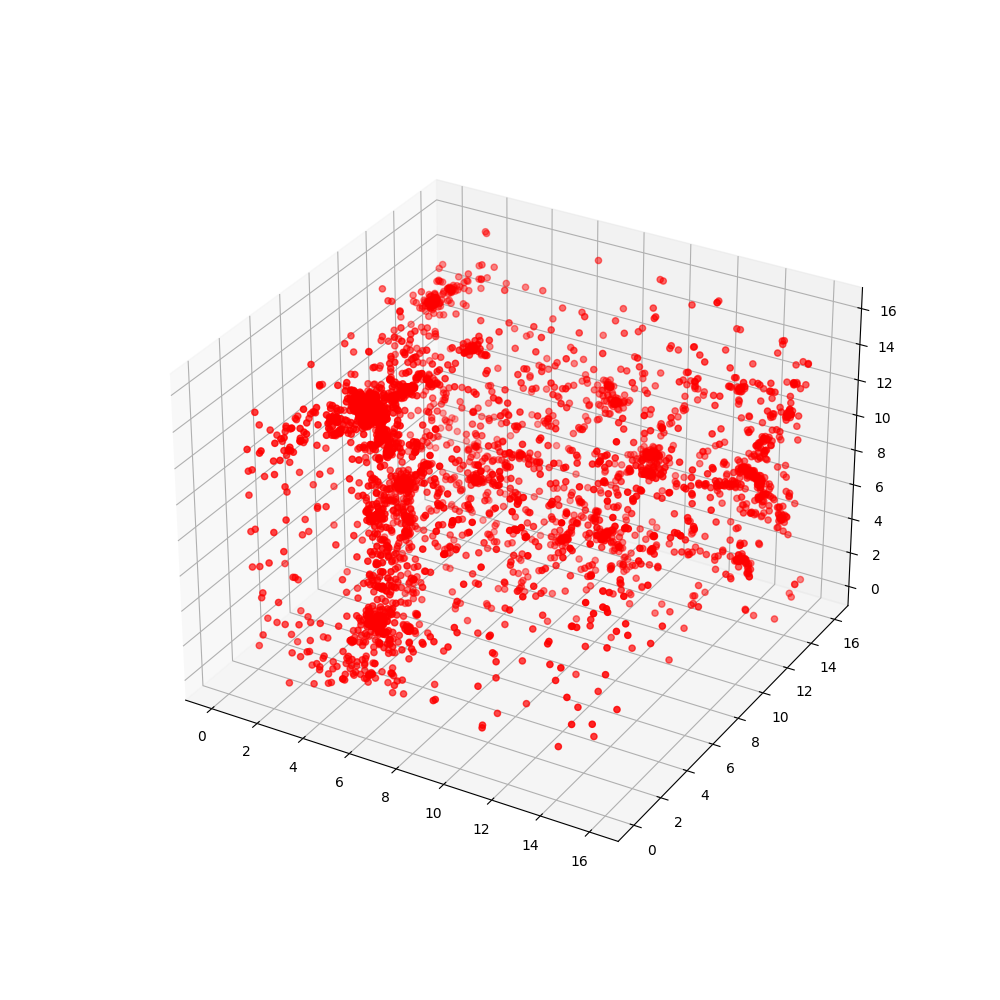

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.loc[:,'x [Mpc]'], data.loc[:,'y [Mpc]'], data.loc[:,'z [Mpc]'], color='red')
plt.show()

## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data.loc[:,'x [Mpc]':'vz [km/s]'] = scaler.fit_transform(data.loc[:,'x [Mpc]':'vz [km/s]'])

data.head()

,x [Mpc],y [Mpc],z [Mpc],vx [km/s],vy [km/s],vz [km/s]
0,-1.435213,-1.304148,-1.804363,0.843486,-0.268774,-0.147684
1,-1.350565,-0.841130,-1.684802,0.924730,-0.315583,-0.223062
2,-1.442118,-1.169286,-1.555957,0.801580,-0.365057,-0.079182
3,-1.289348,-0.977812,-1.961163,1.111860,-0.251090,-0.321693
4,-0.951938,-1.066080,-1.688382,1.302483,-0.317697,-0.382428


In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 

# kmeans = KMeans(n_clusters=10)
# kmeans.fit(data)
# labels = kmeans.labels_

agg = AgglomerativeClustering(n_clusters=10)
agg.fit(data)
labels = agg.labels_

# dbscan = DBSCAN(eps=0.5)
# dbscan.fit(data)
# labels = dbscan.labels_




In [7]:
labels

array([3, 3, 3, ..., 7, 7, 8], dtype=int64)

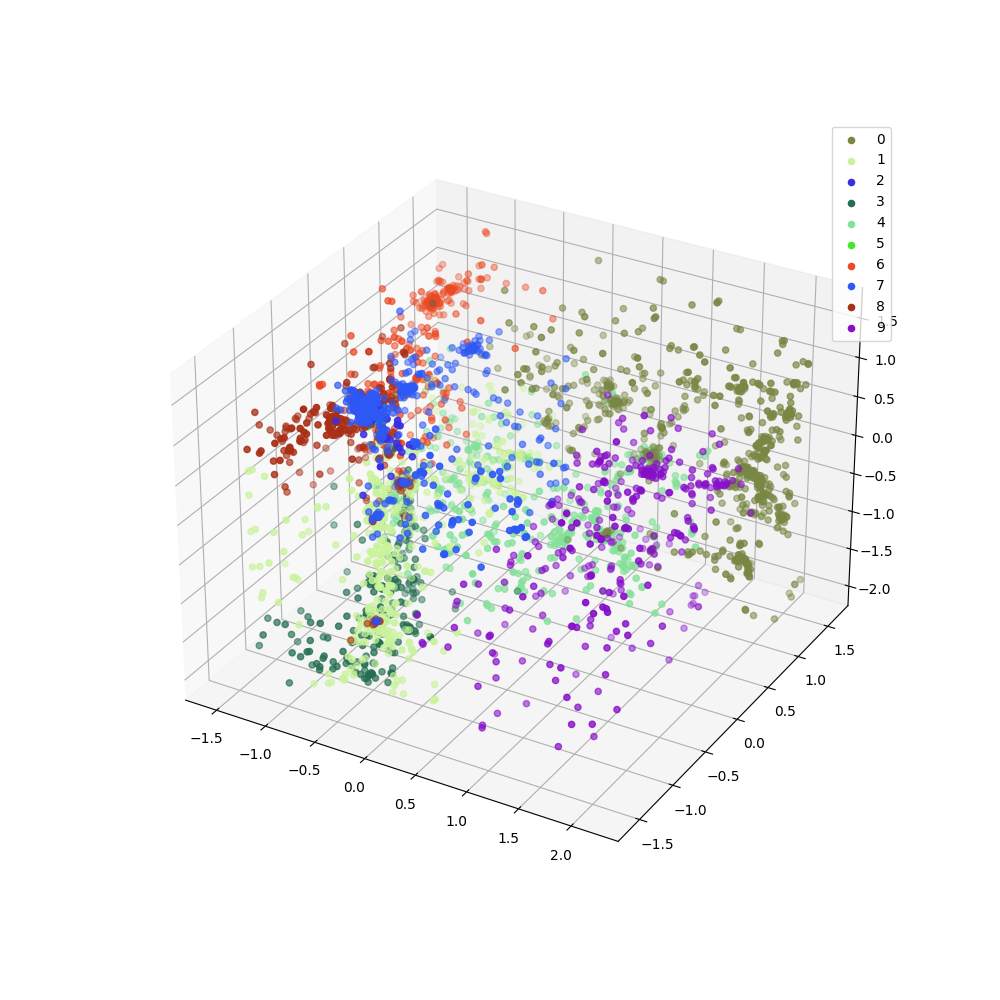

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(labels):
    rgb = np.random.rand(3,)
    ax.scatter(data[labels == label].loc[:,'x [Mpc]'], 
               data[labels == label].loc[:,'y [Mpc]'], 
               data[labels == label].loc[:,'z [Mpc]'], c=[rgb], label=label)

plt.legend()



